# Problem Overview
 

## Description 
The overarching purpose of our research project is it study the relationship between different risk factors that can cause cardiovascular disease. We believe it is an important undertaking because we are always looking to understand the relationships between lifestyle and health. With science-backed findings, we want to help individuals in making better decisions, communities in promoting healthier public health practices, and governments in finding the best balance in resource-allocation between public healthcare and research and development.

## Background
For decades now, cardiovascular disease has been the leading killer of Americans. In the past years however, advances in biomedical research has improved emergency response systems and treatment, and public health has been better in prevention efforts. [Source: CVD: A costly burden for America](https://healthmetrics.heart.org/wp-content/uploads/2017/10/Cardiovascular-Disease-A-Costly-Burden.pdf). Even so, cardiovascular disease continues to be the leading cause of death, a major cause of disability, and a major contributor to productivity loss in Americans. In fact, an estimated 71.3 million--about one in three--Americans have one or more types of heart disease. This burden translates not only in the loss of life, but also affects society’s quality of lives and puts a toll on public healthcare spending that could otherwise be put into other social good programs. Prevention is usually much cheaper to invest in than treatment, and so understanding risk factors has a huge potential impact on reducing burden. [Source: An overview of CVD burden in the U.S.](https://www.healthaffairs.org/doi/full/10.1377/hlthaff.26.1.38)

## Data Description and Features
Data description: We will be working on a dataset about cardiovascular disease [available on Kaggle](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) that consists of 70,000 records of patients data. We were particularly interested in exploring a research question in the domain of healthcare. We wanted to understand the relationship between some given risk factors that contribute to a certain disease. The main outcome that we are concerned with is the presence or absence of cardiovascular disease. Our search led us to this dataset and had all the relevant information that we could use to predict cardiovascular disease. 

There are 3 types of input features:
1. **Objective:** factual information
2. **Examination:** results of medical examination
3. **Subjective:** information given by the patient



| Feature | Variable Type   | Variable   | Value Type  |
|------|------|------|------|
|   Age  | Objective Feature|age | int(days)|
|   Height  | Objective Feature |height |int(cm)|
|   Weight  | Objective Feature |weight |float(kg)|
|   Gender  | Objective Feature |gender |categorical code|
|   Systolic blood pressure  | Examination Feature |ap_hi |int|
|   Diastolic blood pressure  | Examination Feature |ap_lo |int|
|   Cholesterol  | Examination Feature |cholesterol |1: normal, 2: above normal, 3: well above normal|
|   Glucose  | Examination Feature | gluc |1: normal, 2: above normal, 3: well above normal|
|   Smoking | Subjective Feature |smoke |binary|
|   Alcohol Intake | Subjective Feature |alco |binary|
|   smoking | Subjective Feature |smoke |binary|
|   Physical Activity | Subjective Feature |active|binary|
|   Presence or absence of cardiovascular disease | Target Variable |cardio |binary|


# Data Preperation

In [276]:
import pandas as pd    
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

# styling 
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [319]:
# read the data from csv file
df = pd.read_csv('data/cardio_train.csv', sep=';', index_col = "id")

In [278]:
# check if the dataframe has any missing values
df.isnull().values.any()

False

In [320]:
# convert the unit of the column "age" in days into in years
df['age_in_years'] = (df['age'] / 365).round().astype('int')

### Outliers


In [280]:
# use describe function to display statistics such as min, max, mean and std for each features 
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


From the table above, we saw some inconsistency in the data. For example, minimum height is **55 cm** (which is 1.8 feet) and minimum weight is **10 kg**, which initially made us believe that the dataset would include children. However, the minimum age is **29 years old**, which means that those data points were possibly incorrectly recorded.

To check our assumptions, we decided to see those outliers visually.
We will be looking at height, weight, high and low blood pressure.

### Height

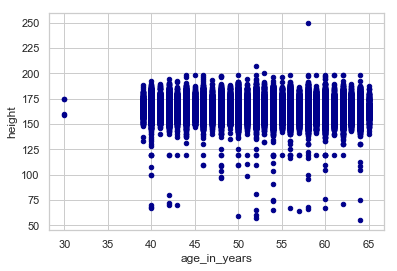

In [281]:
# create a scatter plot that tells us which dots could be considered as outliers 
height = df.plot.scatter(x='age_in_years', y='height', c='DarkBlue')

From the above scatter plot, we can see that there are some data that are not within the cluster and seems to be the outliers. 

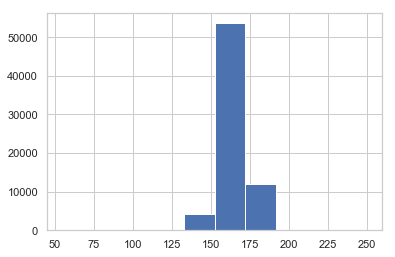

In [282]:
# create a histogram that displays the distribution of individual's height
df.height.hist()

From the bar graph above, we see that the distribution is not normal.  
To remove outliers, we decided to drop any data that's over the quantile of **97.5%** and under **2.5%**.

In [283]:
# remove height outliers
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)

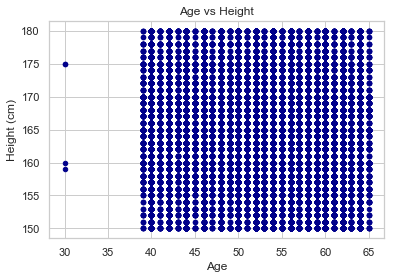

In [284]:
# create a scatter plot that shows the correlation between age and height after removing outliers
height_after_scat = df.plot.scatter(x='age_in_years', y='height', c='DarkBlue', title="Age vs Height")
plt.xlabel("Age")
plt.ylabel("Height (cm)")
plt.show()

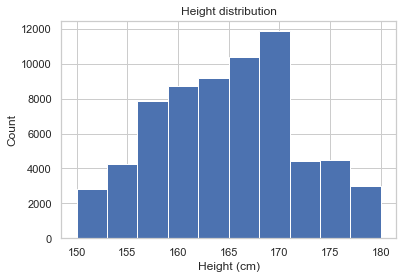

In [285]:
# create a histogram that shows the distribution of height after removing outliers
height_after_hist = df.height.hist()
plt.title("Height distribution")
plt.xlabel("Height (cm)")
plt.ylabel("Count")
plt.show()

After removing the outliers, we can see that the scatter plot is more evenly spread and bar graph is more evenly distributed. 

### Weight

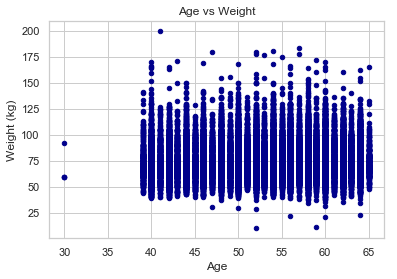

In [286]:
# create a scatter plot that tells us which dots could be considered as outliers 
weight = df.plot.scatter(x='age_in_years', y='weight', c='DarkBlue')
plt.title("Age vs Weight")
plt.xlabel("Age")
plt.ylabel("Weight (kg)")
plt.show()

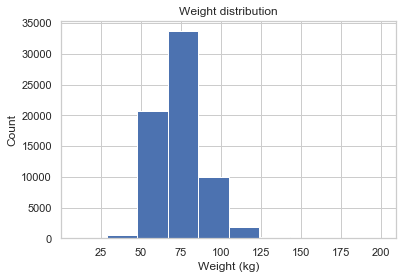

In [287]:
# create a histogram that displays the distribution of individual's weight
df.weight.hist()
plt.title("Weight distribution")
plt.xlabel("Weight (kg)")
plt.ylabel("Count")
plt.show()

In [288]:
# get rid of outliers by dropping whichever values that falls below 2.5% or above 97.5% 
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

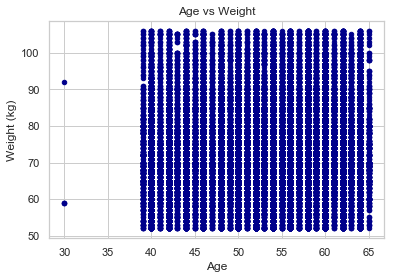

In [289]:
# create a scatter plot that shows the correlation between age and weight after getting rid of outliers
weight2 = df.plot.scatter(x='age_in_years', y='weight', c='DarkBlue')
plt.title("Age vs Weight")
plt.xlabel("Age")
plt.ylabel("Weight (kg)")
plt.show()

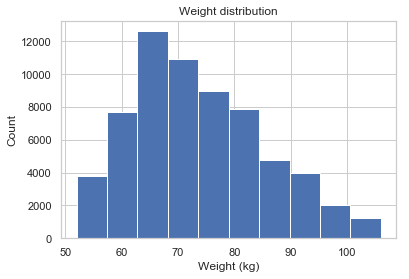

In [290]:
# create a histogram that shows the distribution of weight after getting rid of outliers
df.weight.hist()
plt.title("Weight distribution")
plt.xlabel("Weight (kg)")
plt.ylabel("Count")
plt.show()

### Blood Pressure

##### High Blood Pressure

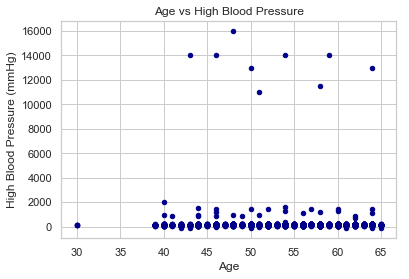

In [291]:
# create a scatter plot that tells us which dots could be considered as outliers for systolic blood pressure
blood_hi = df.plot.scatter(x='age_in_years', y='ap_hi', c='DarkBlue')
plt.title("Age vs High Blood Pressure")
plt.xlabel("Age")
plt.ylabel("High Blood Pressure (mmHg)")
plt.show()

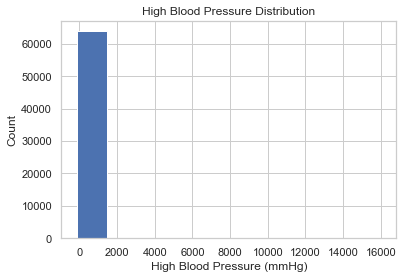

In [292]:
# create a histogram that displays the distribution of each individual's systolic blood pressure
df.ap_hi.hist()
plt.title("High Blood Pressure Distribution")
plt.xlabel("High Blood Pressure (mmHg)")
plt.ylabel("Count")
plt.show()

In [293]:
# remove outliers by dropping whichever values that falls below 2.5% or above 97.5% for systolic blood pressure and diastolic blood pressure
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)


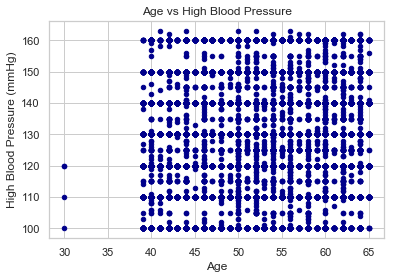

In [294]:
# Scatter after removing high blood pressure outliers
blood_hi = df.plot.scatter(x='age_in_years', y='ap_hi', c='DarkBlue')
plt.title("Age vs High Blood Pressure")
plt.xlabel("Age")
plt.ylabel("High Blood Pressure (mmHg)")
plt.show()

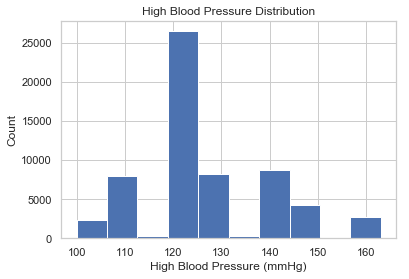

In [295]:
# Histogram after removing high blood pressure outliers
df.ap_hi.hist()
plt.title("High Blood Pressure Distribution")
plt.xlabel("High Blood Pressure (mmHg)")
plt.ylabel("Count")
plt.show()

##### Low Blood Pressure

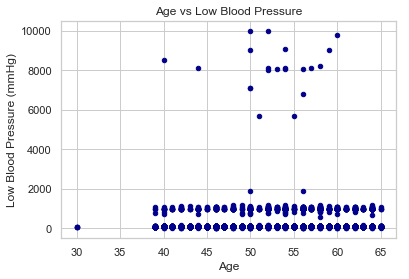

In [296]:
# create a scatter plot that tells us which dots could be considered as outliers for diastolic blood pressure
blood_lo = df.plot.scatter(x='age_in_years', y='ap_lo', c='DarkBlue')
plt.title("Age vs Low Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Low Blood Pressure (mmHg)")
plt.show()


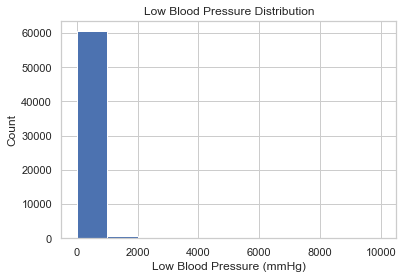

In [297]:
# create a histogram that displays the distribution of each individual's diastolic blood pressure
df.ap_lo.hist()
plt.title("Low Blood Pressure Distribution")
plt.xlabel("Low Blood Pressure (mmHg)")
plt.ylabel("Count")
plt.show()

In [321]:
# remove outliers by dropping whichever values that falls below 2.5% or above 97.5% for systolic blood pressure and diastolic blood pressure
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

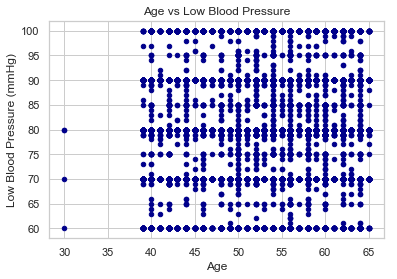

In [299]:
# Scatter after removing low blood pressure outliers
blood_hi = df.plot.scatter(x='age_in_years', y='ap_lo', c='DarkBlue')
plt.title("Age vs Low Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Low Blood Pressure (mmHg)")
plt.show()

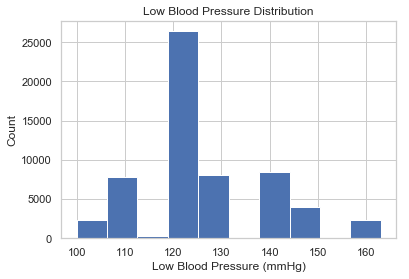

In [300]:
# Histogram after removing low blood pressure outliers
df.ap_hi.hist()
plt.title("Low Blood Pressure Distribution")
plt.xlabel("Low Blood Pressure (mmHg)")
plt.ylabel("Count")
plt.show()

## Data Modification
In order to perform modeling on the data, we have to first uniform the data set and get it to be the data we can work with. 

Turn continuous data (BMI & Blood pressure) into ordinal datas because we are trying to minimize the predictor types to two, binary and ordinal. 
- Calculated BMIs using weight and height. 
- Created new feature, BMI_Scale. 
- Converted blood pressure from continous to scale of 1-3 (Normal, High Blood Pressure, Hypertensive crisis).  
- Changed gender from 1 and 2 to 0 and 1.  
So now all ordinal features should have the same scale of 1-3.

In [322]:
# create a column called BMI 
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

We created a new feature :
- **Body Mass Index (BMI):**

$$BMI=\frac{mass(kg)}{height(m)^2}$$ 


In [323]:
# create a new column called bmi_scale with 1, 2, 3 scale indicating 
# underweight", "Healthy", "overweight" respectively.
conditions = [(df['bmi'] < 18.5), ((df['bmi'] >= 18.5) & (df['bmi'] <= 24.9)), (df['bmi'] > 24.9)]
choices = [1,2,3] 
df['bmi_scale'] = np.select(conditions, choices, default=np.nan).astype('int')

In [329]:
# create a column called blood pressure where we categorize 'Systolic blood pressure'  & 'Diastolic blood pressure'
conditions = [\
              ((df['ap_hi'] <= 129) & (df['ap_lo'] < 80)), \
              (((df['ap_hi'] >= 130) & (df['ap_hi'] < 140)) | ((df['ap_lo'] >= 80) & (df['ap_lo'] <= 90))), \
              ((df['ap_hi'] >= 140) | (df['ap_lo'] > 90))]
choices = [1, 2, 3] #["Normal", "High Blood Pressure", "Hypertensive crisis"]
df['blood_pressure'] = np.select(conditions, choices).astype('int')
df.groupby('blood_pressure').count()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi,bmi_scale
blood_pressure,,,,,,,,,,,,,,,
1,12611,12611,12611,12611,12611,12611,12611,12611,12611,12611,12611,12611,12611,12611,12611
2,50807,50807,50807,50807,50807,50807,50807,50807,50807,50807,50807,50807,50807,50807,50807
3,4667,4667,4667,4667,4667,4667,4667,4667,4667,4667,4667,4667,4667,4667,4667


In [304]:
# create a column called gender_new where we convert values 1-2 to 0-1
conditions = [(df['gender'] == 1), (df['gender'] == 2)]
choices = [0,1] #["Underweight", "Healthy", "Overweight", "Obese"]
df['gender_new'] = np.select(conditions, choices)#, default=np.nan).astype('int')
df.drop('gender', axis=1)

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_in_years,bmi,bmi_scale,blood_pressure,gender_new
id,,,,,,,,,,,,,,,,
0,18393,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,2,2,1
1,20228,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,3,2,0
2,18857,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,2,2,0
3,17623,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,3,2,1
4,17474,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,2,1,0
8,21914,151,67.0,120,80,2,2,0,0,0,0,60,29.384676,3,2,0
9,22113,157,93.0,130,80,3,1,0,0,1,0,61,37.729725,3,2,0
12,22584,178,95.0,130,90,3,3,0,0,1,1,62,29.983588,3,2,1
13,17668,158,71.0,110,70,1,1,0,0,1,0,48,28.440955,3,1,0


# Data Study

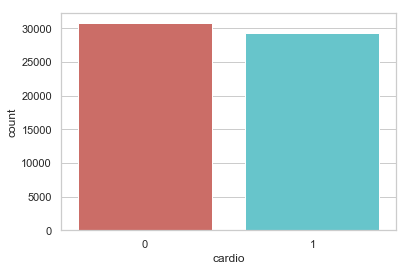

In [305]:
# create a graph that showcases the distribution of people who have and don't have the cardiovascular disease
df['cardio'].value_counts()
sns.countplot(x="cardio", data=df, palette="hls")
plt.show()

In [306]:
# make a function that creates a stacked bar of different features versus Cardiovascular disease
def viz_stack(df, factor, title, xlabel, ylabel, xlabels, rot): 
    table=pd.crosstab(df[factor],df.cardio)
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(range(len(xlabels)), xlabels, rotation=rot)

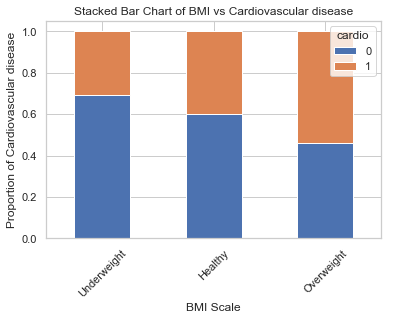

In [307]:
# create a stacked bar of BMI scale versus proportion of Cardiovascular disease
bmi_xlabels=["Underweight", "Healthy", "Overweight"]
viz_stack(df, "bmi_scale", "Stacked Bar Chart of BMI vs Cardiovascular disease", "BMI Scale", "Proportion of Cardiovascular disease", bmi_xlabels, 45)


From the graph above we can see that overweight people have the highest percentage of cardiovascular disease and people with underweight have the lowest percentage of cardiovascular disease. 

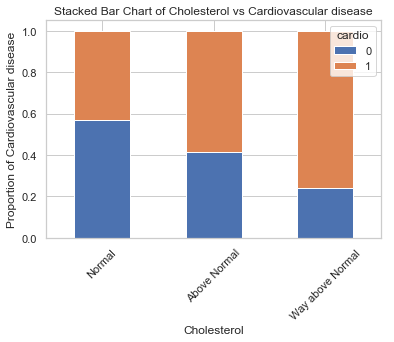

In [308]:
# create a stacked bar of Cholesterol versus proportion of Cardiovascular disease
cholesterol_xlabels = ["Normal", "Above Normal", "Way above Normal"]
viz_stack(df, "cholesterol", "Stacked Bar Chart of Cholesterol vs Cardiovascular disease", "Cholesterol", "Proportion of Cardiovascular disease", cholesterol_xlabels, 45)


From the above graph we can see that the people with cholestrol level of way above normal have highest percentage of cardiovascular disease, and people with cholestrol level of normal have lowest percentage of cardio vascular disease. 

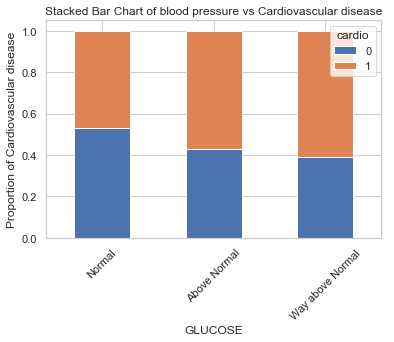

In [309]:
# creates a stacked bar of Cholesterol versus proportion of Cardiovascular disease
gluc_xlabels = ["Normal", "Above Normal", "Way above Normal"]
viz_stack(df, "gluc", "Stacked Bar Chart of blood pressure vs Cardiovascular disease", "GLUCOSE", "Proportion of Cardiovascular disease", gluc_xlabels, 45)


From the above graph we can see that the people with glucose level of way above normal have highest percentage of cardiovascular disease, and people with glucose level of normal have lowest percentage of cardio vascular disease. 

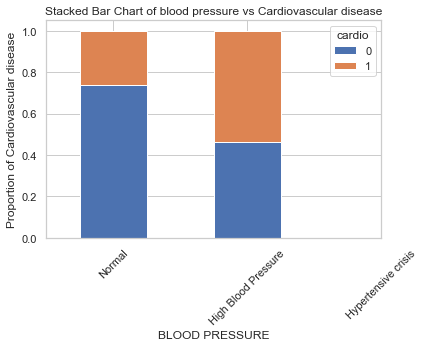

In [310]:
# creates a stacked bar of Cholesterol versus proportion of Cardiovascular disease
blood_xlabels = ["Normal", "High Blood Pressure", "Hypertensive crisis"]
viz_stack(df, "blood_pressure", "Stacked Bar Chart of blood pressure vs Cardiovascular disease", "BLOOD PRESSURE", "Proportion of Cardiovascular disease", blood_xlabels, 45)


From the above graph we can see that people with hypertensive crisis have highest cardiovascular disease percentage, and people with normal blood pressure have lowest cardiovascular disease percentage.

In [332]:
def viz_cat(df, cat, xlabel, title, labels):
    # could reorder legedn + plot

    df_categorical = df.loc[:, cat]
    g = sns.countplot(x="variable", hue="value", data= pd.melt(df_categorical), palette='hls');
    g.set_xticklabels(df_categorical, rotation=30)
    g.set_xlabel(xlabel)

    plt.legend(title='level', labels=labels, loc='upper right')
    plt.show(g)

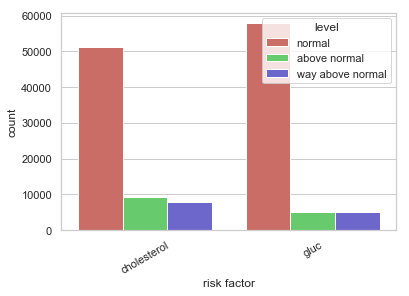

In [333]:
labels=['normal', 'above normal', 'way above normal']
cat = ['cholesterol','gluc']
viz_cat(df, cat, 'risk factor', 'level', labels )

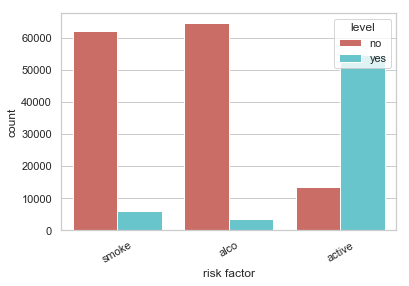

In [334]:
cat = ['smoke', 'alco', 'active']
labels=['no', 'yes']
viz_cat(df, cat, 'risk factor', 'level', labels )

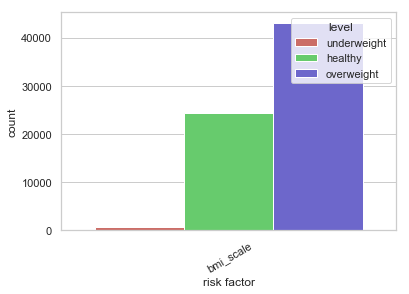

In [335]:
cat = ['bmi_scale']
labels=['underweight', 'healthy', 'overweight']
viz_cat(df, cat, 'risk factor', 'level', labels )

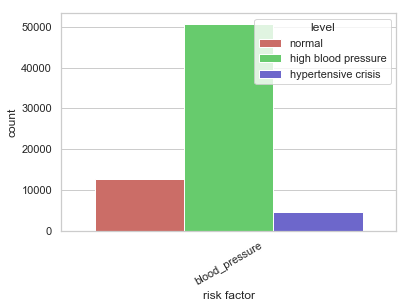

In [336]:
cat = ['blood_pressure']
labels=['normal', 'high blood pressure', 'hypertensive crisis']
viz_cat(df, cat, 'risk factor', 'level', labels )

This is the distribution of our data across different factors, particularly cholesterol levels, glucose levels, smoker status, alcohol drinker status, and bmi category.

From here, we can see that most of the individuals in the dataset have normal cholesterol levels and normal glucose levels. Most of them also don't smoke, don't drink, and are active in lifestyle.   Looking at the BMI scale distribution, the largest category that individuals fall under are overweight, followed by healthy and underweight. Looking at the blood pressure distribution, the largest category that individuals fall under is high blood pressure, followed by normal and hypertensive crisis.

##  Statistical Model

### Logistic Regression


Our dataset contains two different types of data: **ordinal/categorical** and **binary**.  
- Ordinal/Categorical data includes cholesterol level (1-3), glucose level (1-3), BMI level (1-3), and blood pressure level (1-3).  
- Binary data includes gender, smoker status, alcohol drinker status, and active status. 

Because the data types are different, we decided to treat them separately when applying our logistic regression model. 

In [339]:
# Logistic regression with categorical data 
formula_cate = "cardio ~ bmi_scale + cholesterol + gluc + blood_pressure"
logistic_model_cate = smf.glm(formula=formula_cate, data=df, family=sm.families.Binomial()).fit()
logistic_model_cate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 cardio   No. Observations:                68085
Model:                            GLM   Df Residuals:                    68080
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42667.
Date:                Tue, 12 Mar 2019   Deviance:                       85335.
Time:                        19:59:16   Pearson chi2:                 6.86e+04
No. Iterations:                     4   Covariance Type:             nonrobust
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.1422      0.057    -72.108      0.000      -4.255      -4.030
bmi_scale          0.4238      0.017     25.576      0.000       0.391       0.456
cholesterol        0.6417      0.015     44.072      0.000       0.613       0.670
gluc              -0.0812      0.017     -4.889      0.000      -0.114      -0.049
blood_pressure     1.1804      0.019     61.734      0.000       1.143       1.218
==================================================================================
"""

The estimated coefficients are in _log odds_. The odds of an event is the probability of that event divided by its complement: 
$$\frac{P}{1-P}$$

By exponentiating the coefficients, we can calculate the odds, which are easier to interpret. 

In [340]:
# Odds ratio of ordinal data
np.exp(logistic_model_cate.params)

Intercept         0.015889
bmi_scale         1.527788
cholesterol       1.899731
gluc              0.921974
blood_pressure    3.255664
dtype: float64

We can then do some interpretation with the data above.  
**Coefficient:** 
- With a unit increase in *BMI scale*, we can expect the odds of cardiovascular disease to increase by almost 1.75 times while holding everything else constant.   
- With a unit increase in *cholesterol level*, we can expect the odds of cardiovascular disease to increase by almost 1.98 times while holding everything else constant.  
- With a unit increase in *glucose level*, we can expect the odds of cardiovascular disease to increase by 0.9 times while holding everything else constant.  
- With a unit increase in *blood pressure level*, we can expect the odds of cardiovascular disease to increase by 3.26 times while holding everything else constant.

**Standard Error:** 
- The standard errors are pretty low for all predictors meaning they we are not too far off from the true mean.   

**P-value:** 
- All p-values are lower than 0.05 so we can say that there are statistical significance between the predictors and cardiovascular disease.  

In [19]:
# Logistic regression with binary data 
formula_bi = "cardio ~ gender_new + smoke + alco + active"

In [21]:
logistic_model_bi = smf.glm(formula=formula_bi, data=df, family=sm.families.Binomial()).fit()
logistic_model_bi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 cardio   No. Observations:                70000
Model:                            GLM   Df Residuals:                    69995
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -48461.
Date:                Mon, 11 Mar 2019   Deviance:                       96922.
Time:                        21:13:27   Pearson chi2:                 7.00e+04
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1323      0.018      7.364      0.000       0.097       0.167
gender_new     0.0635      0.017      3.760      0.000       0.030       0.097
smoke         -0.1329      0.030     -4.458      0.000      -0.191      -0.074
alco          -0.0233      0.036     -0.653      0.514      -0.093       0.047
active        -0.1775      0.019     -9.301      0.000      -0.215      -0.140
==============================================================================
"""

We would apply the same logic as categorical data

In [22]:
# Odds ratio of binary data
np.exp(logistic_model_bi.params)

Intercept     1.141416
gender_new    1.065585
smoke         0.875586
alco          0.976927
active        0.837350
dtype: float64

**Coefficient:**
- Individuals with cardiovascular disease are...
    - 1.07 times more likely to be male than female.  
    - 0.88 times more likely to be smokers than non smokers.    
    - 0.98 times more likely to be alcohol drinkers than non-alcohol drinkers.
    - 0.84 times more likely to live active lifestyles than inactive lifestyles.  
    
**Standard Error:** 
- The standard errors are pretty low for all predictors meaning they we are not too far off from the true mean.   

**P-value:** 
- All p-values are lower than 0.05 except alcohol so we can say that there are statistical significance between the predictors and cardiovascular disease. 

## Machine learning

In [30]:
# For splitting data
from sklearn.model_selection import train_test_split 
# For scaler/normalization
from sklearn.preprocessing import MinMaxScaler 
# Preprocessor
from sklearn.preprocessing import PolynomialFeatures
# Feature selections
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold
# for making pipelines
from sklearn.pipeline import make_pipeline           
# for grid search
from sklearn.model_selection import GridSearchCV  

# split train feature data into test and training data
train_features, test_features, train_outcome, test_outcome = train_test_split(
   df.drop(["cardio"], axis=1),      
   df['cardio'],      
   test_size=0.30, 
   random_state=11 
)


In [33]:
import warnings
warnings.filterwarnings("ignore")

def run_model(model, param_grid, xtrain, ytrain, xtest, ytest, do_poly = False):
    # Create a scaler
    scaler = MinMaxScaler()

    # Create polynomial transformation, percentile selector, and variance threshold 
    selecter = SelectPercentile()
    threshold = VarianceThreshold(.1)
    if do_poly: 
        poly = PolynomialFeatures()
        pipe = make_pipeline(poly, threshold, selecter, scaler, model)
    else: 
        pipe = make_pipeline(threshold, selecter, scaler, model)

    grid = GridSearchCV(pipe, param_grid)
    grid.fit(xtrain, ytrain)
    grid.best_params_
    accuracy = grid.score(xtest, ytest)
    return grid, accuracy
    


In [34]:
# Model 1: k-Nearest Neighbors Regressor
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
param_grid_knc = {'kneighborsclassifier__n_neighbors': np.arange(1,10),
                 'kneighborsclassifier__weights':["uniform", "distance"]}


grid_knc_a, score = run_model(knc, param_grid_knc, train_features, train_outcome, test_features, test_outcome, do_poly = False)
score

0.6469047619047619

In [35]:
# Model 2: Decision Tree Regressor 
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
param_grid_dtc = {'decisiontreeclassifier__max_depth': np.arange(1,10)}

grid_dtc, score = run_model(dtc, param_grid_dtc, train_features, train_outcome, test_features, test_outcome, do_poly = False)
score

0.6469047619047619

In [36]:
# Model 3: Logistic Regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False)
param_grid_linear = {'polynomialfeatures__degree':range(1, 3), 
              'selectpercentile__percentile':range(10, 30, 5)}
grid_dtc, score = run_model(lr, param_grid_linear, train_features, train_outcome, test_features, test_outcome, do_poly = True)
score

0.19543478925231428

In [37]:
# Model 4: BayesianRidge 
from sklearn.linear_model import BayesianRidge
bay = BayesianRidge()
param_grid_linear = {'polynomialfeatures__degree':range(1, 3), 
              'selectpercentile__percentile':range(10, 30, 5)}
grid_dtc, score = run_model(bay, param_grid_linear, train_features, train_outcome, test_features, test_outcome, do_poly = True)
score

0.19635300517621135